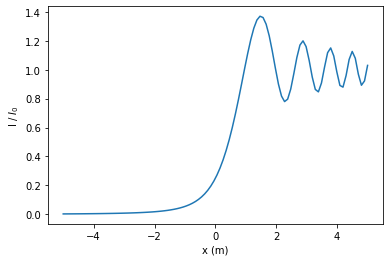

In [3]:
import numpy as np
from gaussxw import gaussxwab
import matplotlib.pyplot as plt
vSom = 343 # m/s
CompOnda = 1 # m
z = 3 # m
N = 50

def integrador(f,N,a,b):
    x,w = gaussxwab(N,a,b)
    integral = 0.0
    for k in range(N):
        integral += w[k]*f(x[k])
    
    return integral

def ISobreI_0(x): # dá-nos o valor de I/I_0
    u = x*np.sqrt(2/(CompOnda*z))
    
    def C(u):
        def f(t):
            return np.cos(0.5 * np.pi * t**2)
        return integrador(f,N,0,u)
    
    def S(u):
        def g(t):
            return np.sin(0.5 * np.pi * t**2)
        return integrador(g,N,0,u)
        
    return 1/8*( (2*C(u)+1)**2 + (2*S(u)+1)**2 )

x = np.linspace(-5,5,100) 
Intensidade = np.zeros(x.shape)
for i in range(100): 
    Intensidade[i] = ISobreI_0(x[i])
    
plt.plot(x, Intensidade)

plt.xlabel('x (m)')
plt.ylabel('I / $I_0$')
plt.show()